# ** 실행 방법 **
```
uv pip install -e .
```

# 1. 워드 클라우드

In [1]:
from dotenv import load_dotenv

load_dotenv()

stopwords = [
    "진짜",
    "정말",
    "영상",
    "채널",
    "구독",
    "좋아요",
    "댓글",
    "보고",
    "수",
    "거",
    "나",
    "그럼",
    "그런",
    "근데",
    "그런데",
    "이런",
    "저런",
    "것",
    "수",
    "등",
    "좀",
    "진짜",
    "ㅋㅋ",
    "ㅋㅋㅋ",
    "ㅋㅋㅋㅋ",
    "ㅎㅎ",
    "ㅎㅎㅎ",
    "아냐",
    "아니",
    "뭐",
    "왜",
    "하고",
    "하는",
    "하다",
    "됐다",
    "되다",
    "있다",
    "없다",
    "때",
    "때문",
    "이유",
    "전주",
    "익산",  # <- 특정 단어가 너무 흔해서 규칙을 망치면 넣어도 됨(선택)
]

In [2]:
import pandas as pd

df = pd.read_csv("../../결과물/시각화/comments.csv")
texts = df["texts"].tolist()
print(texts)


['과거 전주였다는 이유로 합치는거면 익산 일부도 전주였는데 그럼 어디까지 합칠껀데 ㅋㅋ', '그럼 하지마~ 없는것들이 고집만 쎄요', '대통령이랑 서울시장 뭐하냐', '전북에는 전주 익산 군산 완주 김제 등 서로 물어 뜯는다 그중 익산 완주가 제일 욕심이 많음 전주 광역시 특레시 절대 못함 익산이 반대할것임 ㅋㅋㅋㅋㅋㅋ 문재인이 특별시 해준다고 했을때 치고 나갔어야 하는데 뽑아준 국회의원들이 입닫고 있으니 유야 무야 된거 아냐 세종시만 특별시 되고......\n차라리 익산 군산 완주 합쳐 익산시를 특례시로 만드는게 나을듯 전주는 위치가 이미 익산 때문에 애매하고 행정이나 의원들이 능력이나 할 의지가 없어 보임', '완주쓰레기 전주소각장에서 태우고있는데 뭔소리냐 ㅋㅋㅋㅋㅋ 완주 지역의원들이 선동하는거다 ㅋㅋㅋㅋ 지들 밥그릇 뺏기기 싫어서', '정치인들 밥그릇 줄여라', '통합해서 국회의원수 좀 줄여라', '통합해서 전완주로 가자~!', '전주랑 완주를 합치면\n전완주', '전주시 인구 완주가 최대 40년안에 역전한다', '완주 군수 존나 웃긴게 전주 국회의원이 통합을 전제로 피지컬AI 따왔는데 통합은 반대하면서 완주에 유치는 해달라고 염병중임ㅋㅋ 개역겨움 지 감투는 지키고 싶어 하면서 진짜 헛구역질나옴..', '둘이합쳐봤자 80만도 안되는데 광역시 ㅇㅈㄹㅋㅋㅋㅋㅋㅋ 전주친구들 죄다 대전간다잖아ㅋ 나도 이사온지 6년인데 ㅈㄴ 좋음 광역시는 애초에 인프라자체가다름 백화점도 많고', '광역시 되어라... 세금 더 내고...\n공무원만 승진의 길이 열린다', '지금 이시점에 우리나라 행정구역 다시 해야한다고 보네요...', '국민은...  본인들 기득권이고.,  완주에서 반대하는건 본인 완주권  기득권 뺏기고 통합 하게되면 본인들 일자리가 줄어는게 있는거겠지...', '완전 특별시?', '통합하세요...완주가 끝내 반대하면  김재는 어떤지?', '[필독]통합의 역사\n\n1980년대 \n*전주인구 급격히 증가 인구과밀\n>> 삼례 봉동 용진 등 완주권으로 인구 확산\

워드클라우드 생성 중...


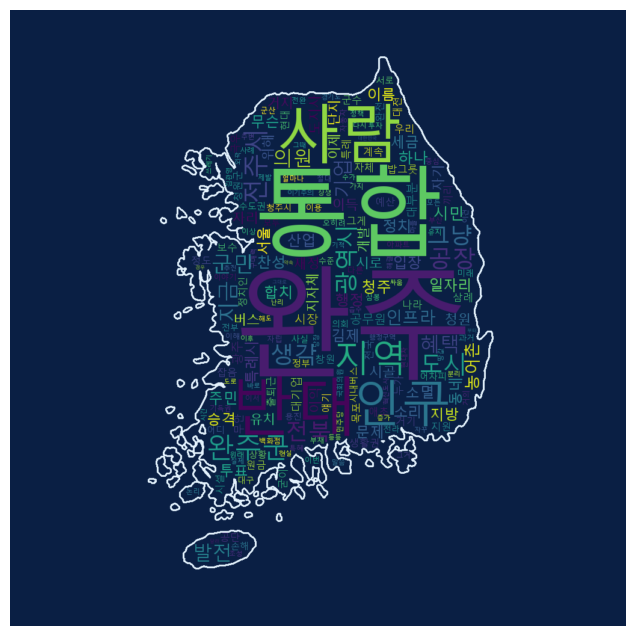

In [3]:
from lib.visualization import word_cloud

word_cloud(texts, stopwords=stopwords, mask_img_path="../../images/korea_mask.png")

In [ ]:
from lib.youtube import collect_all_comments

rows, texts = collect_all_comments("FVFRVGSvkq0")

print(len(rows), len(texts))
print(rows[:100], texts[:100])

In [ ]:
import pandas as pd

csv = pd.DataFrame({"texts": texts})
csv.to_csv("./시각화_결과물/comments.csv")

# 2. 장바구니 분석

In [4]:
import re


def clean_ko(s: str) -> str:
    s = s.lower()
    s = re.sub(r"[^0-9a-zA-Z가-힣\s]", " ", s)  # 특수문자 제거
    s = re.sub(r"\s+", " ", s).strip()
    return s


# 최소한의 불용어(필요하면 계속 추가)
STOP = {
    "그럼",
    "그런",
    "근데",
    "그런데",
    "이런",
    "저런",
    "것",
    "수",
    "등",
    "좀",
    "진짜",
    "ㅋㅋ",
    "ㅋㅋㅋ",
    "ㅋㅋㅋㅋ",
    "ㅎㅎ",
    "ㅎㅎㅎ",
    "아냐",
    "아니",
    "뭐",
    "왜",
    "하고",
    "하는",
    "하다",
    "됐다",
    "되다",
    "있다",
    "없다",
    "때",
    "때문",
    "이유",
    "전주",
    "익산",  # <- 특정 단어가 너무 흔해서 규칙을 망치면 넣어도 됨(선택)
}


def text_to_items(text: str, min_len: int = 2) -> list[str]:
    t = clean_ko(text)
    toks = [w for w in t.split() if len(w) >= min_len]
    toks = [w for w in toks if w not in STOP]
    return toks


items_list = [text_to_items(t) for t in texts]
items_list[:3]


[['과거', '전주였다는', '이유로', '합치는거면', '일부도', '전주였는데', '어디까지', '합칠껀데'],
 ['하지마', '없는것들이', '고집만', '쎄요'],
 ['대통령이랑', '서울시장', '뭐하냐']]

In [5]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

# STOP_NOUN = {"전북","전주","익산","군산","완주","김제"}  # 너무 흔하면 제외(선택)
STOP_NOUN = []


def nouns_kiwi(text: str) -> list[str]:
    text = clean_ko(text)
    tokens = kiwi.tokenize(text)
    nouns = [t.form for t in tokens if t.tag.startswith("NN")]  # 명사류
    nouns = [n for n in nouns if len(n) >= 2 and n not in STOP_NOUN]
    return nouns


items_list = [nouns_kiwi(t) for t in texts]
df_items = pd.DataFrame({"items": items_list})


In [6]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_arr = te.fit(items_list).transform(items_list)
te_arr


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]],
      shape=(2560, 3081))

In [7]:
import pandas as pd

# 문장에 각각의 단어들이 있는지 없는지를 True / False
df = pd.DataFrame(te_arr, columns=te.columns_)


In [ ]:
df.sum()

In [8]:
from mlxtend.frequent_patterns import apriori, association_rules

# support는 전체 문장 중에 itemset이 등장한 문장의 비율
# min_support : support가 min_support 이상인것만 보여주세요
# max_len : max_len개의 조합까지 보여주세요
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True, max_len=2)
frequent_itemsets

,support,itemsets
0,0.045312,(공장)
1,0.050000,(광역시)
2,0.041797,(군민)
3,0.048047,(기업)
4,0.032422,(농어촌)
...,...,...
89,0.030859,"(전주, 지역)"
90,0.132031,"(통합, 전주)"
91,0.022266,"(혜택, 전주)"
92,0.025000,"(전주시, 통합)"


In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules[["antecedents", "consequents", "support", "confidence", "lift"]]

,antecedents,consequents,support,confidence,lift
0,(공장),(완주),0.032422,0.715517,2.086246
1,(완주),(공장),0.032422,0.094533,2.086246
2,(공장),(전주),0.038281,0.844828,2.379272
3,(전주),(공장),0.038281,0.107811,2.379272
4,(광역시),(전주),0.021875,0.437500,1.232123
...,...,...,...,...,...
89,(전주),(혜택),0.022266,0.062706,1.672167
90,(전주시),(통합),0.025000,0.492308,1.883868
91,(통합),(전주시),0.025000,0.095665,1.883868
92,(통합),(지역),0.030078,0.115097,1.610102


In [ ]:
pivot_data = rules.head(20).pivot_table(
    index="antecedents",  # 행
    columns="consequents",  # 열
    values="lift",  # 기준
    fill_value=0,  # 매칭되지 않는 것은 이걸로 채워라.
)


In [10]:
from lib.analysis import market_basket_ko

result = market_basket_ko(
    texts,
    min_support=0.02,
    max_len=2,
    top_k=20,
    stop_noun=["전북", "전주", "익산", "군산", "완주", "김제"],  # 필요하면
)


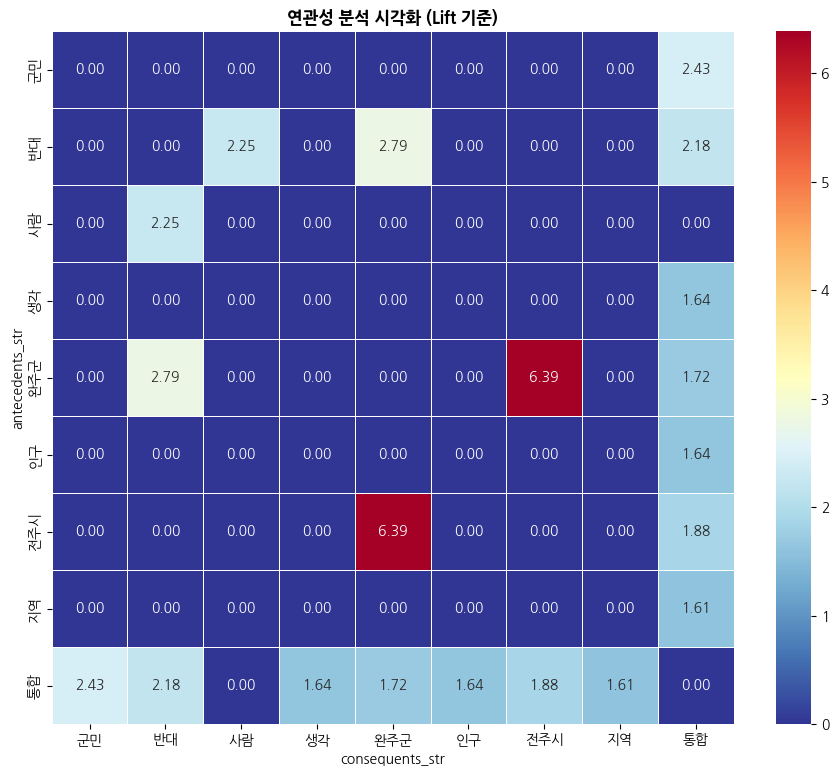

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

# lift_matrix: (index=Antecedents, columns=Consequents) 형태의 DataFrame이라고 가정
df = result.copy()["pivot_data"]

# 0은 마스킹(표시 안 함)

# 대각선도 숨기기(자기 자신)

# 1을 기준으로 색이 갈리도록(= lift 1은 중립)

plt.figure(figsize=(11, 9))
ax = sns.heatmap(
    df,
    cmap="RdYlBu_r",  # 1 아래/위가 잘 구분됨
    linewidths=0.6,
    linecolor="white",
    square=False,
    # cbar_kws={"label": "Lift", "shrink": 0.9},
    annot=True,
    fmt=".2f",
)

ax.set_title("연관성 분석 시각화 (Lift 기준)", weight="bold")
# ax.set_xlabel("Consequents", fontsize=11)
# ax.set_ylabel("Antecedents", fontsize=11)

# 라벨 가독성
# plt.xticks(rotation=30, ha="right")
# plt.yticks(rotation=0)

# sns.despine(left=True, bottom=True)
# plt.tight_layout()
plt.show()


AttributeError: QuadMesh.set() got an unexpected keyword argument 'interpolation'

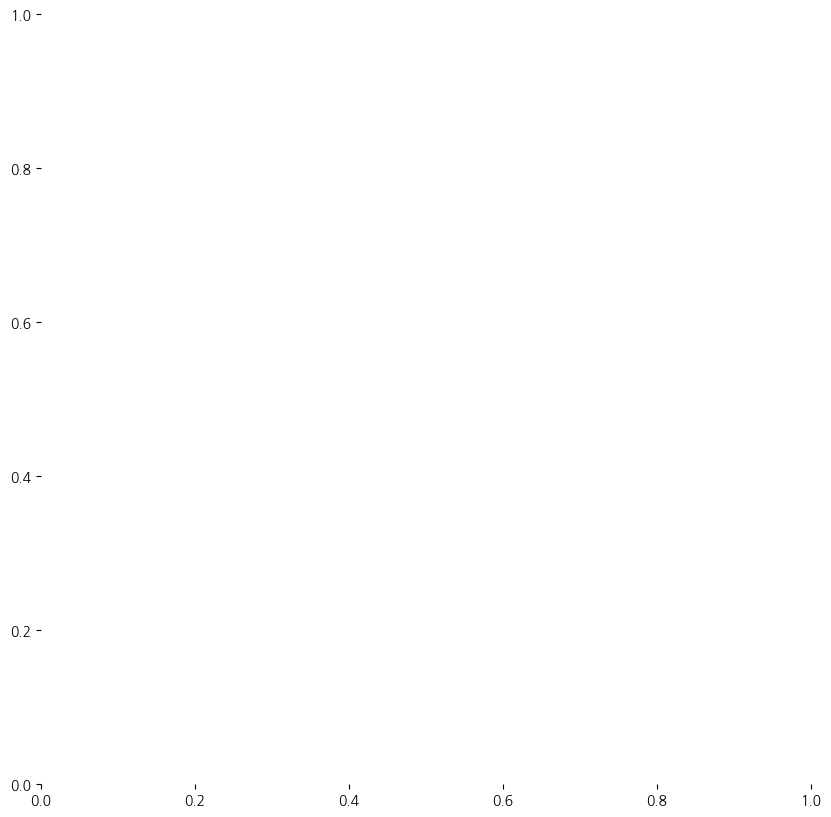

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib  # noqa: F401


plt.figure(figsize=(10, 10))
sns.heatmap(
    result["pivot_data"],
    linewidths=0.3,
    linecolor=(1, 1, 1, 0.3),
    cmap="RdYlBu_r",
    square=True,
    annot=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.9},
)
plt.title("연관성 분석 시각화(Lift 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import koreanize_matplotlib  # noqa: F401, F811

rules = result["rules"]
my_rules = rules.sort_values(by=["lift"], ascending=False).head(50)

# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
for _, col_data in my_rules.iterrows():
    # 1) 단어 추출
    print(f"[BEFORE] {col_data['antecedents']}, {col_data['consequents']}")
    antecedent = ",".join(col_data["antecedents"])
    consequent = ",".join(col_data["consequents"])
    print(f"[AFTER] {antecedent}, {consequent}")
    print("=" * 100)

    # 2) 지표 추출
    weight = col_data["lift"]

    # 3) 그래프에 정보 추가
    G.add_edge(antecedent, consequent, weight=weight)

G.edges()

[BEFORE] frozenset({'전주시'}), frozenset({'완주군'})
[AFTER] 전주시, 완주군
[BEFORE] frozenset({'완주군'}), frozenset({'전주시'})
[AFTER] 완주군, 전주시
[BEFORE] frozenset({'완주군'}), frozenset({'반대'})
[AFTER] 완주군, 반대
[BEFORE] frozenset({'반대'}), frozenset({'완주군'})
[AFTER] 반대, 완주군
[BEFORE] frozenset({'군민'}), frozenset({'통합'})
[AFTER] 군민, 통합
[BEFORE] frozenset({'통합'}), frozenset({'군민'})
[AFTER] 통합, 군민
[BEFORE] frozenset({'사람'}), frozenset({'반대'})
[AFTER] 사람, 반대
[BEFORE] frozenset({'반대'}), frozenset({'사람'})
[AFTER] 반대, 사람
[BEFORE] frozenset({'통합'}), frozenset({'반대'})
[AFTER] 통합, 반대
[BEFORE] frozenset({'반대'}), frozenset({'통합'})
[AFTER] 반대, 통합
[BEFORE] frozenset({'통합'}), frozenset({'전주시'})
[AFTER] 통합, 전주시
[BEFORE] frozenset({'전주시'}), frozenset({'통합'})
[AFTER] 전주시, 통합
[BEFORE] frozenset({'통합'}), frozenset({'완주군'})
[AFTER] 통합, 완주군
[BEFORE] frozenset({'완주군'}), frozenset({'통합'})
[AFTER] 완주군, 통합
[BEFORE] frozenset({'통합'}), frozenset({'생각'})
[AFTER] 통합, 생각
[BEFORE] frozenset({'생각'}), frozenset({'통합'})
[AFTER] 생각, 통합
[BEF

EdgeView([('전주시', '완주군'), ('전주시', '통합'), ('완주군', '반대'), ('완주군', '통합'), ('반대', '사람'), ('반대', '통합'), ('군민', '통합'), ('통합', '생각'), ('통합', '인구'), ('통합', '지역'), ('통합', '도시'), ('통합', '사람')])

In [ ]:
# 3. 노드 배치
# position = nx.kamada_kawai_layout(G, scale=0.5)
# k를 조절하면 노드간 거리를 조절할 수 있습니다.
position = nx.spring_layout(G, k=0.9, seed=15)

# 4. 가중치 추출
scale = 0.3  ## 선의 굵기가 너무 굵다면 사이즈를 줄일 수 있습니다.
edge_weights = [G[u][v]["weight"] * scale for u, v in G.edges()]
print(edge_weights)

# 5. 그리기
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, position, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G, position, edge_color="gray", width=edge_weights)
nx.draw_networkx_labels(G, position, font_size=10, font_family="Malgun Gothic")
plt.title("단어 간 연관규칙 기반 네트워크 그래프(Lift 기준)")
plt.axis("off")
plt.show()